In [1]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%%time
zip_path = '/content/drive/My Drive/Colab Notebooks/allimgs_face2.zip'
!cp "{zip_path}" .
!unzip -q allimgs_face2.zip 
!rm allimgs_face2.zip

replace allimgs_face/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
CPU times: user 78.1 ms, sys: 14.8 ms, total: 93 ms
Wall time: 18.6 s


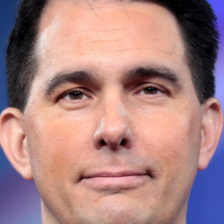

In [4]:
from torchvision import datasets, models, transforms
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import torch
from PIL import Image
import numpy as np

original_trans= transforms.Compose([
    transforms.Resize((224,224))
        ])
hor_flip_transform = transforms.Compose([
    transforms.Resize((224,224)),
     transforms.RandomHorizontalFlip(p=1)
        ])

rot_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomRotation(degrees = 90)
        ])

cj_transform = transforms.Compose([
    transforms.Resize((224,224)),
     transforms.ColorJitter(0.1,0.1,0.1,0.1)
        ])

p_transform = transforms.Compose([
    transforms.Resize((224,224)),
     transforms.RandomPerspective()
        ])

transforms.RandomPerspective()
# allimgs_face/Catherine GABRELLE candidat/google_Catherine GABRELLE candidat1.jpeg
img = Image.open('/content/allimgs_face/Scott Walker GOP/google_Scott Walker GOP1.jpeg')
hor_flip_img = hor_flip_transform(img)
rot_img = rot_transform(img)
cj_img = cj_transform(img)
p_img = p_transform(img)
p_img

In [5]:
or_imgs = original_trans(img)
imgs = [or_imgs, hor_flip_img,rot_img,cj_img,p_img]
imgs_one = [or_imgs, hor_flip_img,rot_img,cj_img,p_img]
imgs_two = [or_imgs, hor_flip_img,rot_img,cj_img,p_img]
imgs

[<PIL.Image.Image image mode=RGB size=224x224 at 0x7F0158ED5908>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x7F0158EC6C50>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x7F0158ED52B0>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x7F0158ED5748>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x7F0158EC6860>]

In [0]:
import matplotlib
import matplotlib.font_manager
matplotlib.rcParams.update({'font.size': 22})

plt.rcParams["font.family"] = "Times New Roman"
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        image = np.array(image)
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.axis('off')
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


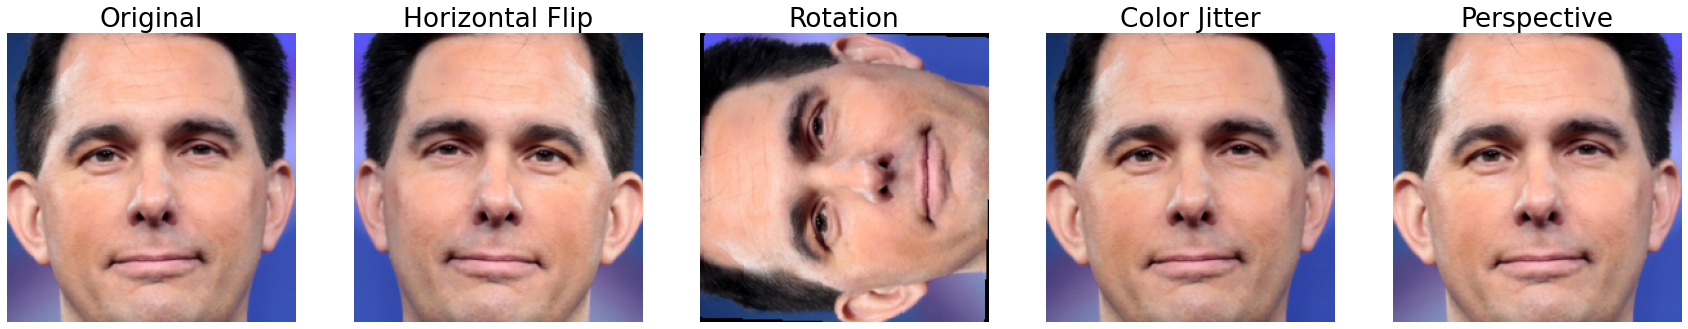

In [7]:
show_images(images = imgs, titles = ['Original', 'Horizontal Flip', 'Rotation', 'Color Jitter', 'Perspective'])